# Exploratory Data Analysis on Boston Housing Dataset

## Predicting Housing Prices from Boston Housing Dataset 

#### This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.
####  We will adopt some basic exploratory data analysis by  utilizing some statistical tools.

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn


import seaborn as sns
from matplotlib import rcParams
sns.set_style('whitegrid')
sns.set_context('poster')

### Loading Dataset from Sklearn

In [2]:
# Importing Boston Housing Dataset from sklearn datasets and storing inside a variable called boston

from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())


dict_keys(['DESCR', 'data', 'target', 'feature_names'])


In [3]:
# determines that the dataset has 506 rows and 13 coloumns
boston.data.shape

(506, 13)

### Describing the Dataset

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
# Determines the column names 
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Setting up our dataset for Linear Regression

In [6]:
#converting boston data into pandas dataframe using pd.Dataframe()

boston_df = pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Replacing integers with feature names as columns.
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Adding "Price" as another feature in the current dataset which is a part of another attribute called "target" 
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston_df.shape

(506, 14)

### Summary Statistics

In [10]:
# Showing summary of each columns using describe()
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Analysis

## Building a regression model

### Step 1: Check for linearity with Scatter Plot

We'll see the relationship between prices and other variables because in order to create a good linear model the features should have a linear relationship with prices.

#### We can see a strong positive correlation between no. of rooms and price. No. of rooms increases/decreases with increase/decrease in price.

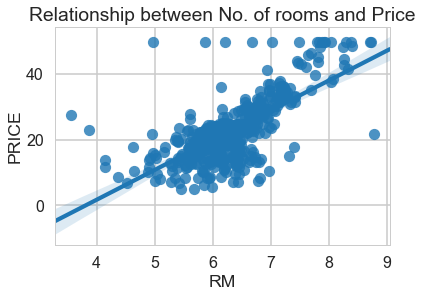

In [11]:
# Between prices and No. of rooms
sns.regplot(x="RM",y="PRICE", data=boston_df, fit_reg=True)
plt.title("Relationship between No. of rooms and Price")
plt.show()


#### We can see a strong negative correlation between lower status population and price. Population of lower status  increases/decreases with decrease/increase in price.

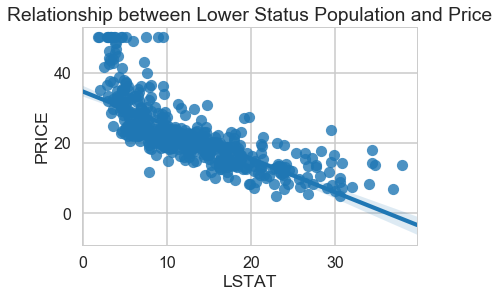

In [12]:
# Between prices and Lower Status Population
sns.regplot(y="PRICE",x="LSTAT", data=boston_df, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

#### We can see a strong negative correlation between NOX concentraation in air and price. The more/less concentration of NOX is in air the less/more the housing prices. 

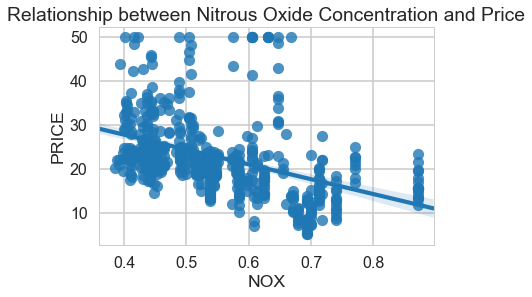

In [13]:
# Between prices and Nitrous Oxide Concentration
sns.regplot(y="PRICE",x="NOX", data=boston_df, fit_reg= True)
plt.title("Relationship between Nitrous Oxide Concentration and Price")
plt.show()

#### We can see a strong postive correlation between distance of 5 employment center from town and price. The closer/farther the employment center from town the more/less the housing prices. 

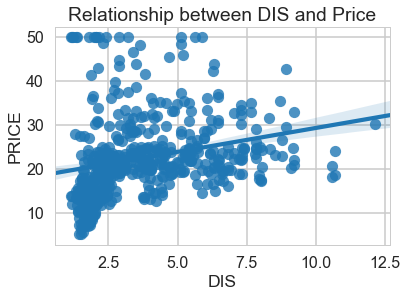

In [15]:
# Between prices and Weighted distance between 5 Boston Employment Center
sns.regplot(y="PRICE",x="DIS", data=boston_df, fit_reg= True)
plt.title("Relationship between DIS and Price")
plt.show()

#### As the no. of students increases per teacher the housing prices decreases.

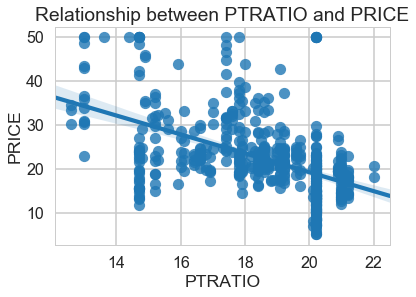

In [16]:
# Between prices and Pupil-Teacher ratio by town
sns.regplot(y="PRICE",x="PTRATIO", data=boston_df, fit_reg= True)
plt.title("Relationship between PTRATIO and PRICE")
plt.show()

#### Weaker still descent predictor .As the no. of crimes increases the housing prices decreases.

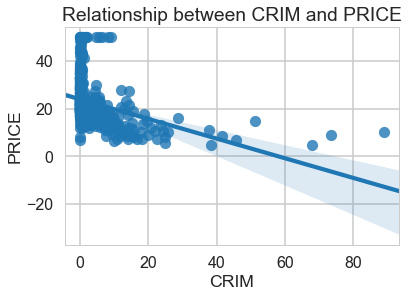

In [17]:
# Between prices and per capita crime rate by town
sns.regplot(y="PRICE",x="CRIM", data=boston_df, fit_reg= True)
plt.title("Relationship between CRIM and PRICE")
plt.show()

### Step: 2 Checking for Normality with histograms

#### We must check for normality among variables . If they skewed in any way we need to transform them by taking log in order to normise them.

We saw that the scatter plot between Price and Crime Rate an observed an exponential decay of crimes. This can be overcome by normalising.

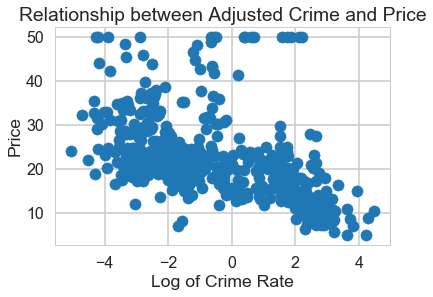

In [18]:
adj_CRIM = np.log(boston_df.CRIM)
plt.scatter(adj_CRIM , boston_df.PRICE)
plt.xlabel("Log of Crime Rate")
plt.ylabel("Price")
plt.title("Relationship between Adjusted Crime and Price")
plt.show()

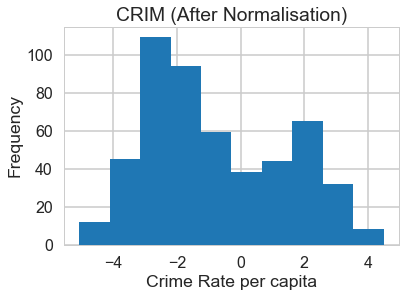

In [19]:
plt.hist(adj_CRIM)
plt.xlabel("Crime Rate per capita")
plt.ylabel("Frequency")
plt.title("CRIM (After Normalisation)")
plt.show()


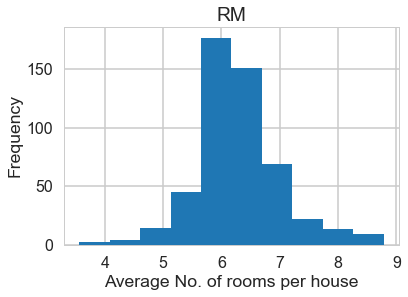

In [20]:
plt.hist(boston_df.RM)
plt.xlabel("Average No. of rooms per house")
plt.ylabel("Frequency")
plt.title("RM")
plt.show()


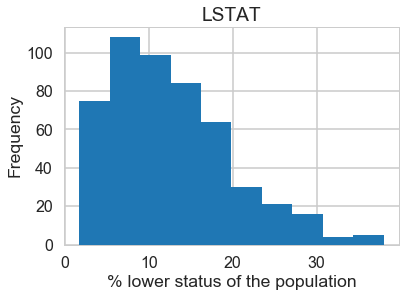

In [21]:
plt.hist(boston_df.LSTAT)
plt.xlabel("% lower status of the population")
plt.ylabel("Frequency")
plt.title("LSTAT")
plt.show()


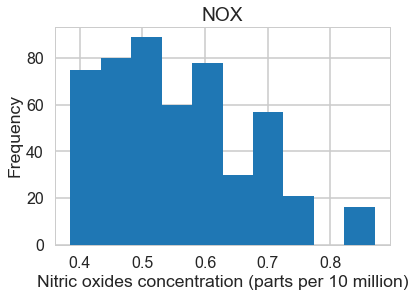

In [22]:
plt.hist(boston_df.NOX)
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
plt.ylabel("Frequency")
plt.title("NOX")
plt.show()

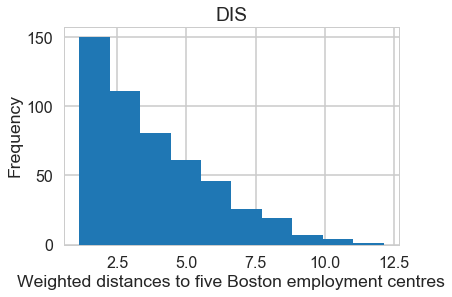

In [23]:
plt.hist(boston_df.DIS)
#plt.hist(np.log(boston_df.DIS))
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Frequency")
plt.title("DIS")
plt.show()

### Let's see relationship among our features i.e Correlation Matrix.

In [24]:
bos_df = boston_df
bos_df['CRIM'] = np.log(bos_df['CRIM'])
df = bos_df.iloc[:,[0,4,5,7,10,12]]
df.corr()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
CRIM,1.000000,0.786196,-0.308210,-0.681142,0.388318,0.623891
NOX,0.786196,1.000000,-0.302188,-0.769230,0.188933,0.590879
RM,-0.308210,-0.302188,1.000000,0.205246,-0.355501,-0.613808
DIS,-0.681142,-0.769230,0.205246,1.000000,-0.232471,-0.496996
PTRATIO,0.388318,0.188933,-0.355501,-0.232471,1.000000,0.374044
LSTAT,0.623891,0.590879,-0.613808,-0.496996,0.374044,1.000000



### Linear regression with Boston housing data example
Here,

$Y$ = boston housing prices (also called "target" data in python)

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regrssion using statsmodels

In [25]:
#importing regression modules
#ols- stands for Ordinary least squares: a method for estimating unknown parameters in a linear regression model
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
m = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS ', bos_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Thu, 21 Jun 2018   Prob (F-statistic):          3.67e-131
Time:                        18:38:49   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

### Interpreting Coeficients

There is lot of information in the above result. We only concentrate on the coefficient table (middle)

* We start interpreting the p **(p > |t|)** value which is very small( basically zero). That means our features are statistically significant predictor of our **PRICE** .


* Again In general each **coef** can be interpreted as an **increase/decrease** with a unit **increase** in the corresponding **feature**.For instance if we compare two groups of towns, one where the average number of rooms is say **5** and the other group is the same except that they all have **6** rooms. For these two groups the average difference in house prices is about **9.1** (in thousands) so about **\$9,100** difference which is nothing but **coef** of **RM**. The confidence interval finds us a range of plausible values for this difference, about **(\$8,279, \$9,925)**.


* Another signicant feature indicated by **NOX** which says on average each unit increase in NOX concentration in area will ultimately decrease the housing price by **\$18,000** net of the other variables. The confidence interval finds us a range of plausible values for this difference,about **(\$11,000, \$24,000)**.


* Another signicant feature indicated by **DIS** which says on average each unit increase in DIS(weighted distances to five Boston employment centres) will ultimately decrease the housing price by **\$1,000** net of the other variables. The confidence interval finds us a range of plausible values for this difference,about **(\$854, \$1,500)**.

### Intrepreting R-Squared

Also known as the coefficient of determination or just R-squared. A statistical measure that tells how well a regression line approximates the real data points.

* In the given model the R-squared value is **0.708** which basically means that approximately **70%** of the total variance in the price can be determined by the current regression model.



### We can have a linear regression equation which can predict housing prices based on CRIM,RM,PTRATIO,LSTAT and DIS

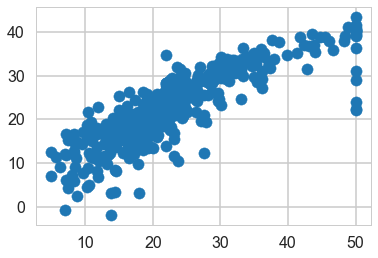

In [39]:
predicted_prices = m.fittedvalues
plt.scatter(  bos_df.PRICE , predicted_prices)
plt.show()

In [ ]:
### Linear Regression using Sklearn Just for fun.

In [31]:
#Spliting test and train set

from sklearn.model_selection import train_test_split
X = boston_df.drop('PRICE', axis = 1)
Y = boston_df['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33,random_state = 5 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


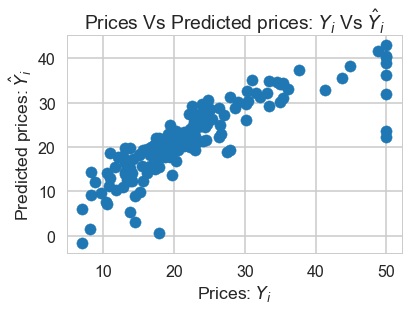

In [32]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,Y_train)

Y_pred = LinReg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [33]:
# displaying the coefficients of parameters  
print("Coefficients: \n", LinReg.coef_)

# displaying the R-squared score
print(LinReg.score(X_test , Y_test))

Coefficients: 
 [ 2.91429472e-01  3.63624438e-02 -2.47555447e-02  1.10925522e+00
 -1.29834557e+01  3.89110219e+00 -1.18923107e-02 -1.24562550e+00
  2.23495573e-01 -1.36600521e-02 -9.70026335e-01  1.17800958e-02
 -5.34376398e-01]
0.7085620605741538


In [36]:
# generating the mean squared error
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
mse

27.320516644637422

c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


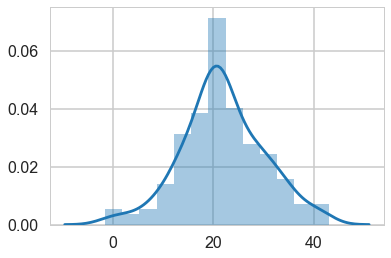

In [37]:
sns.distplot(Y_pred)